In [61]:
import pandas as pd
import os

# **Loading Data**

In [62]:
dir = "/home/erika/UCSD/UCSD/capstone/NLP_with_Disaster_Tweets/data/tweeter_disaster_text_analysis"
file = "train.csv"
file_path = os.path.join(dir,file)

df = pd.read_csv(file_path, encoding='utf-8')


# **Exploring data**

In [63]:
df.head()

,id,keyword,location,text,target,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,ablaze,Birmingham,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,ablaze,Est. September 2012 - Bristol,Forest fire near La Ronge Sask. Canada,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,ablaze,AFRICA,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,ablaze,"Philadelphia, PA","13,000 people receive #wildfires evacuation orders in California",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,ablaze,"London, UK",Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7613 non-null   int64  
 1   keyword      7583 non-null   object 
 2   location     5108 non-null   object 
 3   text         7612 non-null   object 
 4   target       7610 non-null   object 
 5   Unnamed: 5   414 non-null    object 
 6   Unnamed: 6   79 non-null     object 
 7   Unnamed: 7   23 non-null     object 
 8   Unnamed: 8   13 non-null     object 
 9   Unnamed: 9   5 non-null      object 
 10  Unnamed: 10  5 non-null      object 
 11  Unnamed: 11  3 non-null      object 
 12  Unnamed: 12  2 non-null      object 
 13  Unnamed: 13  1 non-null      float64
dtypes: float64(1), int64(1), object(12)
memory usage: 832.8+ KB


In [65]:
df.shape

(7613, 14)

### Checking commas within the text in the csv file

In [66]:
## 408 rows out of 7613 that have been moved out of the target column

df.loc[(df["Unnamed: 13"].notnull())|(df["Unnamed: 12"].notnull())|(df["Unnamed: 11"].notnull())|(df["Unnamed: 10"].notnull())|(df["Unnamed: 9"].notnull())|(df["Unnamed: 8"].notnull())|(df["Unnamed: 7"].notnull())|(df["Unnamed: 6"].notnull())|(df["Unnamed: 5"].notnull())|(df["Unnamed: 5"].notnull())]

,id,keyword,location,text,target,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
21,32,ablaze,Est. September 2012 - Bristol,London is cool,),0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,71,ablaze,England.,First night with retainers in. It's quite weird. Better get used to it,I have to wear them every single night for the next year at least.,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,89,ablaze,Twitter Lockout in progress,Rene Ablaze &amp,Jacinta - Secret 2k13 (Fallen Skies Edit) - Mar 30 2013 https://t.co/7MLMsUzV1Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,92,ablaze,"Calgary, AB",#NowPlaying: Rene Ablaze &amp,Ian Buff - Magnitude http://t.co/Av2JSjfFtc #EDM,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,96,accident,CLVLND,'I can't have kids cuz I got in a bicycle accident &amp,split my testicles. it's impossible for me to have kids' MICHAEL YOU ARE THE FATHER,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7462,10678,wounds,"Tampa, FL",@NicolaClements4 IÛªm not sure that covering my head in wounds and scabs is the solution,),0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7463,10679,wounds,Not Steven Yeun / AMC.,@DauntedPsyche - Man gently dabbed the cotton rag across each one of his wounds,the pain a lot more worse than Glenn had ever -,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7479,10698,wreck,United States,@_PokemonCards_ @IceQueenFroslas why did they have to wreck it with ON SALE HERE,-,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7510,10743,wreckage,WorldWide,#Australia #News,RT janeenorman: 'High probability' aircraft wreckage is from #MH370 according to Deputy Prime Û_ http://t.co/cdOHgnJmsT,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Cleaning data**

#### **Data PreProcessing** ####

In [67]:
df.head()

,id,keyword,location,text,target,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,ablaze,Birmingham,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,ablaze,Est. September 2012 - Bristol,Forest fire near La Ronge Sask. Canada,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,ablaze,AFRICA,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,ablaze,"Philadelphia, PA","13,000 people receive #wildfires evacuation orders in California",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,ablaze,"London, UK",Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **1. Fixing Format : Removing carrier return in all columns.**  

In [69]:
data = df.copy(deep=True)
data.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r", "\r"], value=["","",""], regex=True, inplace=True)
data.shape

(7613, 14)

#### **2. Copy df into a file to clean data line by line.**


In [70]:
dir = "/home/erika/UCSD/UCSD/capstone/NLP_with_Disaster_Tweets/data/tweeter_disaster_text_analysis"
file = "train_temp.csv"
file_path = os.path.join(dir,file)
data.to_csv(file_path, index = False)

#### **3. Checking unique target values**

        

In [71]:
lst = []
dic = {}
target_pattern = ",{1}.+$"

with open (file_path, "r") as f:
    next(f)
    for line in f:
        line = line.strip("\n")
        line = line.strip(",")
        line = line.strip()        
        target = line.rsplit(',',1)[1]
        lst.append(target)

target_unique = set(lst)
print(target_unique)

{'0', '1', '0.0'}


#### **4. Formatting data to get all values into their corresponding columns** ####

In [72]:
import re
lst = []
dic = {}
count = 0


id_pattern = "^.+?,"                                #anything before the first comma
keyword_pattern = ",.*?,"                           #anything between the first and second comma.  It can be null
location_pattern_1 = ",\".+?\",{1}"                 #first quoted value between commas
location_pattern_2 = ",.*?,(.*?),"                  #grouping: second value between commas.  It can be null

with open (file_path, "r") as f:
    next(f)
    for line in f:
        # removing commas at the end of the row.
        line = line.strip("\n")
        line = line.strip(",")
        line = line.strip()        

        #Getting Id
        id_search = re.search(id_pattern, line)        
        id = id_search.group()[:-1]                
        
        #Getting keyword
        keyword_search = re.search(keyword_pattern,line)
        keyword = keyword_search.group()[1:-1]
        
        if re.search(location_pattern_1, line) != None:    
            #Getting location
            location_search = re.search(location_pattern_1, line)
            location = location_search.group()[1:-1]                        
            
        else:    
            #Getting location
            location_search = re.search(location_pattern_2, line)
            location = location_search.group(1)        
                    
        #Getting target                             #anything after the last comma
        target = line.rsplit(',',1)[1]
        
        #Getting text
        before_text = id + "," + keyword + "," + location + ","
        after_text = ","+target
        text = line.replace(before_text,"")         #removed id, keyword, loaction from the orininal string
        text = text.replace(after_text,"")          #removed target. Text is what is left - with commas, quotes, anything so we keep the text as complete as possible.
              
        #target = int(target)        

        #Getting data into a dataframe
        dic = {}
        dic["id"] = id
        dic["keyword"]=keyword
        dic["location"]= location
        dic["text"]=text
        dic["target"] = target
        lst.append(dic)
    
tweets_df = pd.DataFrame(lst)
tweets_df


,id,keyword,location,text,target
0,1,ablaze,Birmingham,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,ablaze,Est. September 2012 - Bristol,Forest fire near La Ronge Sask. Canada,1
2,5,ablaze,AFRICA,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,ablaze,"""Philadelphia, PA""","""13,000 people receive #wildfires evacuation orders in California """,1
4,7,ablaze,"""London, UK""",Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...,...
7608,10869,,,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,,,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,,,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


In [73]:
#replacing %20 by space.
tweets_df["keyword"] = tweets_df["keyword"].str.replace("%20"," ")

#### **5. Cleaning target: Updating target to integer to remove 0.0** ####

In [74]:
tweets_df["target"].unique()

array(['1', '0', '0.0'], dtype=object)

In [75]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   object
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   object
dtypes: object(5)
memory usage: 297.5+ KB


In [76]:
tweets_df["target"] = tweets_df["target"].astype(float)
tweets_df["target"] = tweets_df["target"].astype(int)
tweets_df.head()

,id,keyword,location,text,target
0,1,ablaze,Birmingham,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,ablaze,Est. September 2012 - Bristol,Forest fire near La Ronge Sask. Canada,1
2,5,ablaze,AFRICA,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,ablaze,"""Philadelphia, PA""","""13,000 people receive #wildfires evacuation orders in California """,1
4,7,ablaze,"""London, UK""",Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [77]:
tweets_df["target"].unique()

array([1, 0])

#### **6 Cleaning text** ####

##### **6a - text to lower case** #####

In [78]:
tweets_df["text"] = tweets_df["text"].str.lower()

##### **6b - Cleaning text** #####

In [79]:
import string
from nltk.corpus import stopwords

pd.set_option("display.max_colwidth", None)
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('corpus')

def cleaning(text):
    url_pattern = "http\S*"
    numb_word_pattern = "\S*\d+\S*"
    punctuation_pattern = string.punctuation
    
    #remove urls
    url_clean = re.sub(url_pattern,"",text)
    
    #remove numbers
    numbers_clean = re.sub(numb_word_pattern,"",url_clean)
    
    #remove punctuation
    punctuation_clean = re.sub("[{}]".format(punctuation_pattern),"",numbers_clean)
    
    #tokenization
    tokens = word_tokenize(punctuation_clean)
    
    #removing stop words
    stop_words = stopwords.words('english')
    stop_words_clean = [word for word in tokens if word not in stop_words]
    #stop_words_clean_str = " ".join(stop_words_clean)
    
    #Stemming
    stemmer = nltk.stem.PorterStemmer()
    stemmer_clean = [stemmer.stem(word) for word in stop_words_clean]
    stemmer_clean_str = " ".join(stemmer_clean)
        
    return stemmer_clean_str


tweets_df["clean_text"] = tweets_df["text"].apply(lambda x: cleaning(x))
tweets_df.head()


dir = "/home/erika/UCSD/UCSD/capstone/NLP_with_Disaster_Tweets/data/tweeter_disaster_text_analysis"
file = "train_clean.csv"
file_path = os.path.join(dir,file)
tweets_df.to_csv(file_path)


[nltk_data] Downloading package punkt to /home/erika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/erika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading corpus: Package 'corpus' not found in index


##### **6b - Cleaning keyword** #####

In [98]:
tweets_df["clean_keyword"] = tweets_df["keyword"].apply(lambda x: cleaning(x))

# **EDA**


#### **1. Target unique values and count** ####


In [80]:
tweets_df["target"].unique()

array([1, 0])

In [81]:
# Data is balanced
tweets_df["target"].value_counts()

0    4343
1    3270
Name: target, dtype: int64

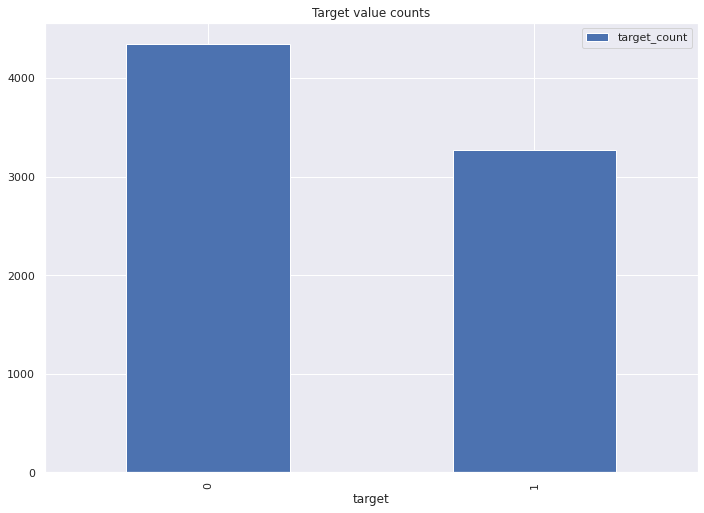

In [82]:
# Q: Is the difference between targets ok? or it will increase the variance.
target_df = tweets_df.groupby(["target"]).agg(target_count=("target","count"))
fig = target_df.plot.bar(title = "Target value counts")


#### **2. Checking missing values** ####

In [83]:
# checking null values
tweets_df.isnull().sum()

id            0
keyword       0
location      0
text          0
target        0
clean_text    0
dtype: int64

In [84]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7613 non-null   object
 1   keyword     7613 non-null   object
 2   location    7613 non-null   object
 3   text        7613 non-null   object
 4   target      7613 non-null   int64 
 5   clean_text  7613 non-null   object
dtypes: int64(1), object(5)
memory usage: 357.0+ KB


In [85]:
# checking blank cells
#If we have a big df, how do we check blank cells across all columns without specifying the column name one by one
#replace blank to nan and then count? and without changing to nan?

#
df_object = tweets_df.select_dtypes(["object"])
df_blank = df_object.apply(lambda x: x.str.len()) # x is the column vector (series)
#how to use value_counts and apply to count all zeros in all columns

#df_blank["keyword"].value_counts()[0]

#for column_name in df_blank.columns:
#    print(str(df_blank[column_name].value_counts()[0]))
#     #print("{} = {}".format(column_name,str(df_blank[column_name].value_counts()[0])))


#df_blank["id"].value_counts()[0]

print("keyword blanks = {}".format(df_blank["keyword"].value_counts()[0]))
print("location blanks = {}".format(df_blank["location"].value_counts()[0]))


keyword blanks = 30
location blanks = 2505


<AxesSubplot:>

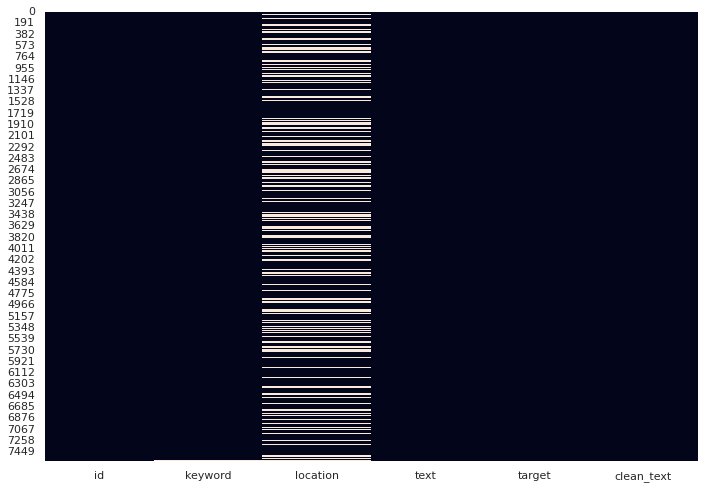

In [86]:
import numpy as np
import seaborn as sns

miss_df = tweets_df.replace(r"^\s*$",np.nan,regex=True)
#miss_df.isnull().sum()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(miss_df.isnull(), cbar=False)

#### **3. Checking unique keyword values** ####

In [87]:
tweets_df["keyword"].unique()

array(['ablaze', 'accident', 'aftershock', 'airplane accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown up', 'body bag', 'body bagging', 'body bags',
       'bomb', 'bombed', 'bombing', 'bridge collapse',
       'buildings burning', 'buildings on fire', 'burned', 'burning',
       'burning buildings', 'bush fires', 'casualties', 'casualty',
       'catastrophe', 'catastrophic', 'chemical emergency', 'cliff fall',
       'collapse', 'collapsed', 'collide', 'collided', 'collision',
       'crash', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone',
       'damage', 'danger', 'dead', 'death', 'deaths', 'debris', 'deluge',
       'deluged', 'demolish', 'demolished', 'demolition', 'derail',
       'derailed', 'derailment', 'desolate',

In [43]:
tweets_df["keyword"].unique()

array(['ablaze', 'accident', 'aftershock', 'airplane accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown up', 'body bag', 'body bagging', 'body bags',
       'bomb', 'bombed', 'bombing', 'bridge collapse',
       'buildings burning', 'buildings on fire', 'burned', 'burning',
       'burning buildings', 'bush fires', 'casualties', 'casualty',
       'catastrophe', 'catastrophic', 'chemical emergency', 'cliff fall',
       'collapse', 'collapsed', 'collide', 'collided', 'collision',
       'crash', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone',
       'damage', 'danger', 'dead', 'death', 'deaths', 'debris', 'deluge',
       'deluged', 'demolish', 'demolished', 'demolition', 'derail',
       'derailed', 'derailment', 'desolate',

In [100]:
tweets_df["clean_keyword"].unique()

array(['ablaz', 'accid', 'aftershock', 'airplan accid', 'ambul',
       'annihil', 'apocalyps', 'armageddon', 'armi', 'arson', 'arsonist',
       'attack', 'avalanch', 'battl', 'bioterror', 'blaze', 'bleed',
       'blew', 'blight', 'blizzard', 'blood', 'bloodi', 'blown',
       'bodi bag', 'bomb', 'bridg collaps', 'build burn', 'build fire',
       'burn', 'burn build', 'bush fire', 'casualti', 'catastroph',
       'chemic emerg', 'cliff fall', 'collaps', 'collid', 'collis',
       'crash', 'crush', 'curfew', 'cyclon', 'damag', 'danger', 'dead',
       'death', 'debri', 'delug', 'demolish', 'demolit', 'derail',
       'desol', 'destroy', 'destruct', 'deton', 'devast', 'disast',
       'displac', 'drought', 'drown', 'dust storm', 'earthquak',
       'electrocut', 'emerg', 'emerg plan', 'emerg servic', 'engulf',
       'epicentr', 'evacu', 'explod', 'explos', 'eyewit', 'famin',
       'fatal', 'fear', 'fire', 'fire truck', 'first respond', 'flame',
       'flatten', 'flood', 'forest fir

#### **4. Top 10 keywords** ####

In [88]:
# keyword frequency in Keyword column
import matplotlib.pyplot as plt

keyword_freq = pd.DataFrame(tweets_df["keyword"].value_counts())
keyword_freq.reset_index(inplace = True)
keyword_freq.rename(columns = {"index":"keyword", "keyword":"count"}, inplace = True)
keyword_freq.sort_values(by=["count"])
keyword_freq.head(10)


,keyword,count
0,ablaze,67
1,fatalities,45
2,armageddon,42
3,deluge,42
4,sinking,41
5,body bags,41
6,harm,41
7,damage,41
8,twister,40
9,outbreak,40


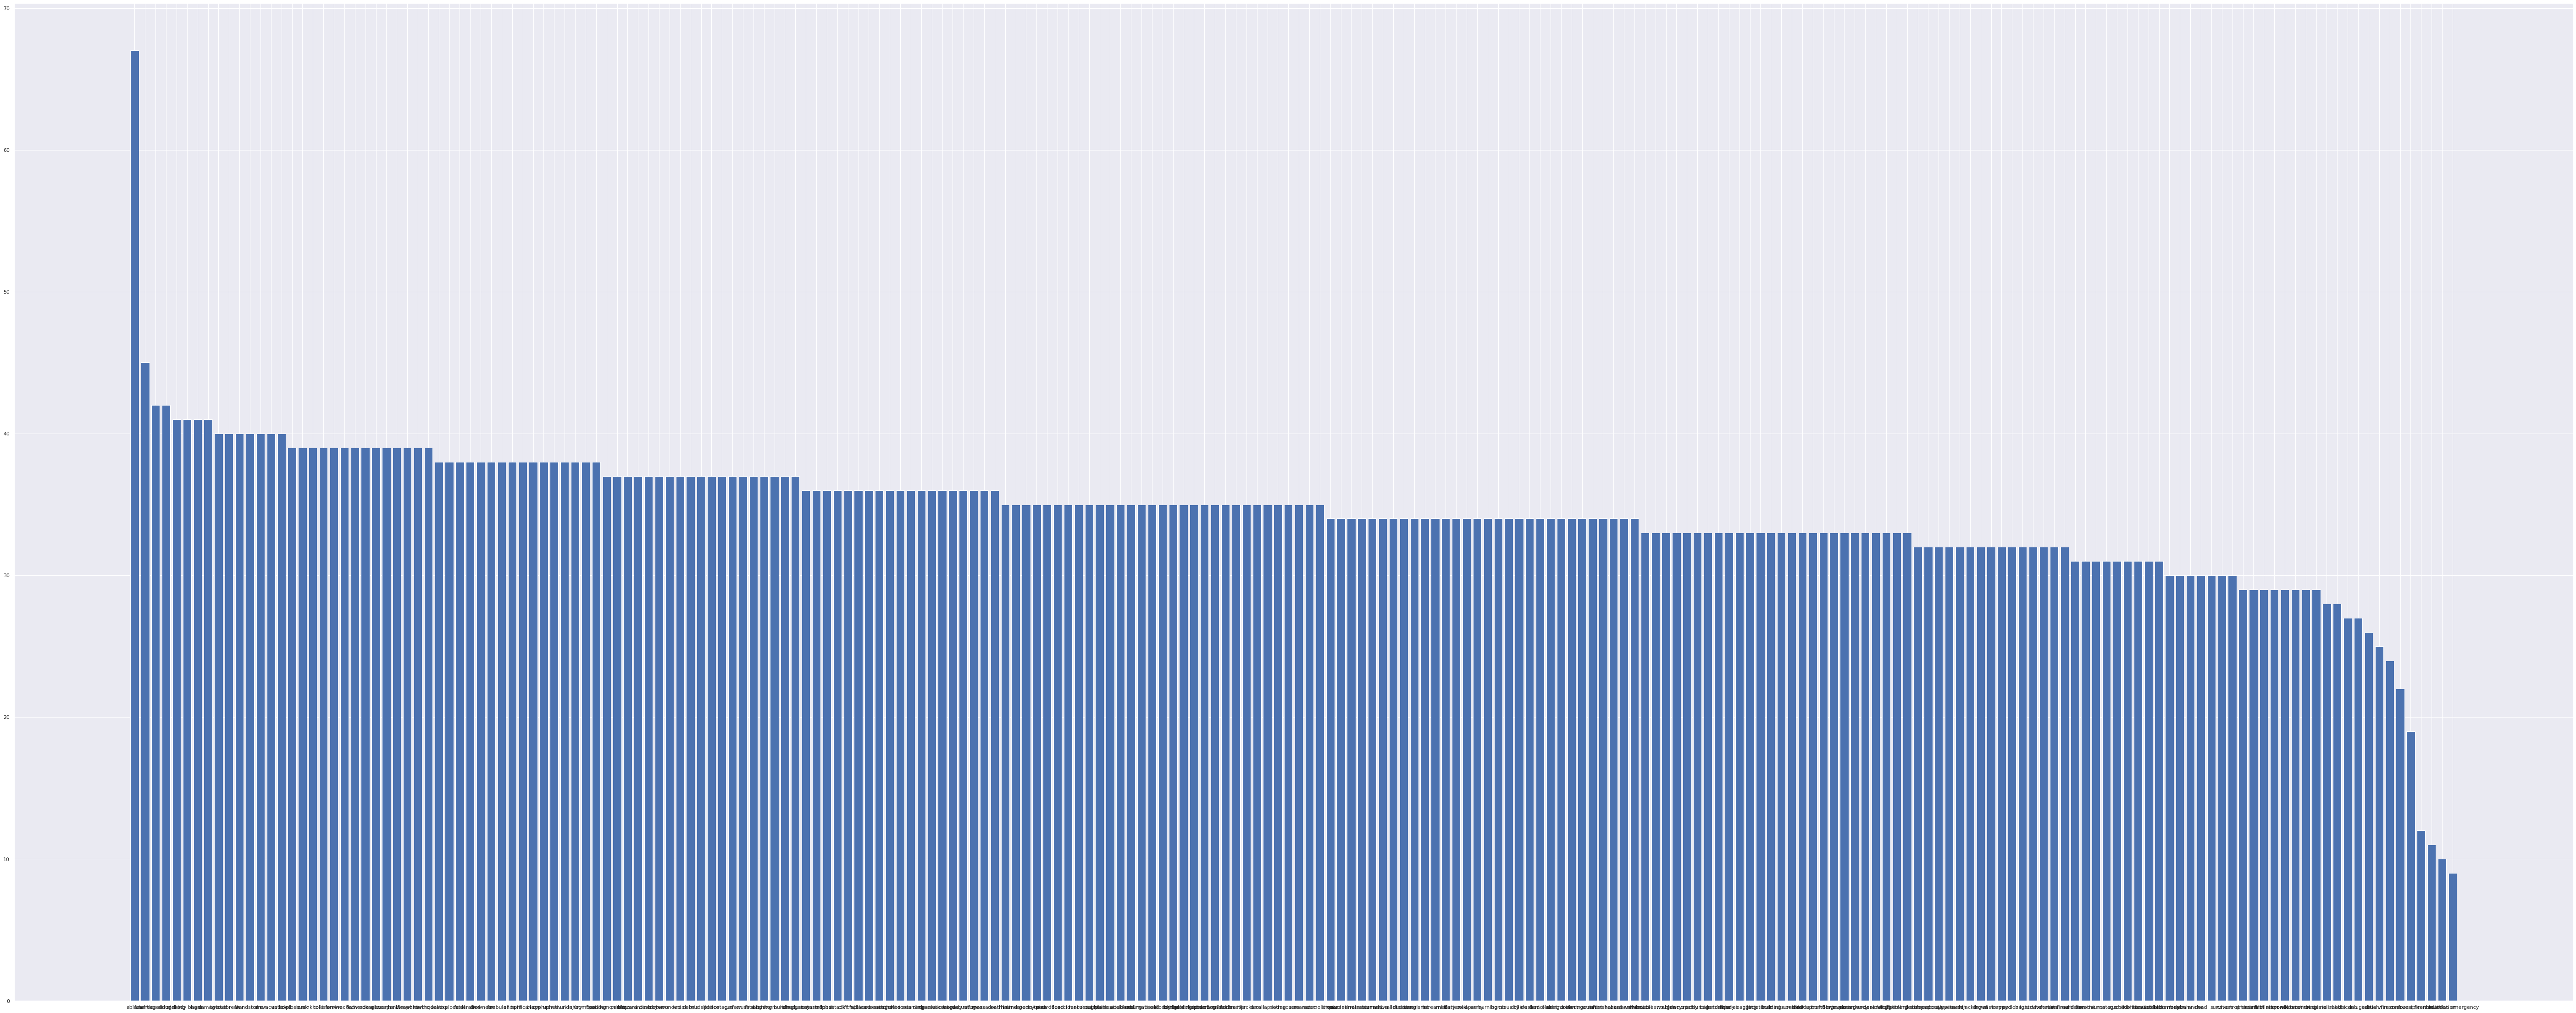

In [89]:
fig = plt.figure(figsize = (100, 40))
plt.bar(keyword_freq["keyword"],keyword_freq["count"])
plt.show()

#### **5. Bottom 10 keywords** ####

In [90]:
keyword_freq.sort_values(by=["count"], ascending = True, inplace = True)
keyword_freq.head(10)

,keyword,count
221,radiation emergency,9
220,inundation,10
219,threat,11
218,epicentre,12
217,forest fire,19
216,rescue,22
215,war zone,24
214,bush fires,25
213,battle,26
212,deluged,27


#### **6. Unique Location values** ####

In [91]:
#pd.options.display.max_rows = 4000
print("Unique location count = {}".format(len(tweets_df["location"].unique())))


Unique location count = 3342


In [92]:
tweets_df["location"].unique()[1:50]

array(['Est. September 2012 - Bristol', 'AFRICA', '"Philadelphia, PA"',
       '"London, UK"', 'Pretoria',
       '"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas"',
       '', 'Paranaque City', 'Live On Webcam', 'World Wide!!',
       'milky way', '"GREENSBORO,NORTH CAROLINA"', 'England.',
       '"Sheffield Township, Ohio"', 'India', 'Barbados', 'Anaheim',
       'Abuja', 'USA', 'South Africa', '"Sao Paulo, Brazil"',
       'hollywoodland ', '"Edmonton, Alberta - Treaty 6"',
       'Inang Pamantasan', 'Twitter Lockout in progress', '"Concord, CA"',
       '"Calgary, AB"', 'San Francisco', 'CLVLND', '"Nashville, TN"',
       '"Santa Clara, CA"', 'UK', '"St. Louis, MO"',
       '"Walker County, Alabama"', 'Australia', 'North Carolina',
       'Norf Carolina', '"San Mateo County, CA"', '"Njoro, Kenya"',
       "Your Sister's Bedroom", '"Arlington, TX"',
       '"South Bloomfield, OH"', '"New Hanover County, NC"', 'Maldives',
       '"Manc

#### **7. Top 50 location** #####

In [93]:
# Location frequency
location_freq = pd.DataFrame(tweets_df["location"].value_counts())
location_freq.reset_index(inplace = True)
location_freq.sort_values(by=["location"], ascending = False, inplace = True)
location_freq.head(20)

,index,location
0,,2505
1,USA,104
2,New York,71
3,United States,50
4,London,45
5,Canada,29
6,Nigeria,28
7,UK,27
8,"""Los Angeles, CA""",26
9,India,24


#### **8. Bottom 50 location** #####

In [94]:
# Q: There's some locations that don't look real.  Should we delete the locaiton value for those columns
# so the model can treat them as no location?   There's only one sample per value.
location_freq.sort_values(by=["location"], ascending = True, inplace = True)
location_freq.head(20)

,index,location
2726,South Korea GMT+9,1
1097,Waddesdon,1
1064,England,1
1056,NYC&NJ,1
1057,swindon,1
1058,Croydon,1
1059,EGYPT,1
1060,"""i got 1/13 menpa replies, omg""",1
1061,where the wild things are,1
1062,Aix-en-Provence/Utrecht,1


##### **Note: location has many miss values and some of them are not valid locations.  We need to drop it.** #####

#### **9. Most common words in text** ####

In [ ]:
#Q:  It's returning all words.  Some of them with no meaning.  It's CountVectorizer used mostly during EDA or when modeling
#from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer

emerg_df = tweets_df.loc[tweets_df["target"]==1,:]
emerg_df.head(10)

# create the transform
cv = CountVectorizer()

# tokenize and build vocabulary
vectorized = cv.fit_transform(emerg_df["text"])

bow = pd.DataFrame(vectorized.toarray(),columns = cv.get_feature_names_out())
bow    

In [96]:
#Tokenization using tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from operator import itemgetter

# Filtering only emergency tweets
emerg_txt = tweets_df.loc[tweets_df["target"]==1,"text"]

# Bag of words
tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(emerg_txt)
word_index = tokenizer.word_index
bow = list(word_index.keys())

# Counting words
vocab_dic = {i : bow.count(i) for i in bow}

#vocab_dic.sort()
vocab_dic.items()


res = dict(sorted(vocab_dic.items(), key = itemgetter(1), reverse = True))


#### **Most common words on emergency tweets** ####

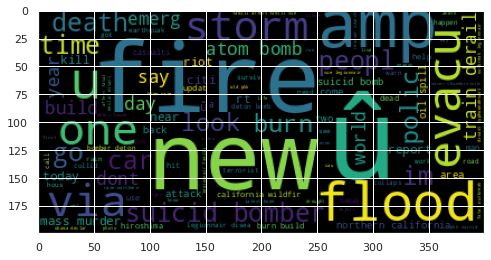

In [95]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

emerg_df = tweets_df.loc[tweets_df["target"]==1,:]["clean_text"]
disaster_text_str = " ".join(emerg_df)
#print(disaster_text_str)
wordcloud = WordCloud().generate(disaster_text_str)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.show()

#### **Most common words on non-emergency tweets** ####

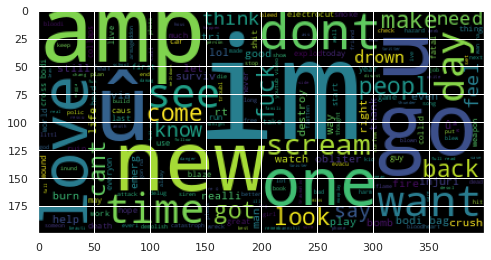

In [97]:
emerg_df = tweets_df.loc[tweets_df["target"]==0,:]["clean_text"]
disaster_text_str = " ".join(emerg_df)
#print(disaster_text_str)
wordcloud = WordCloud().generate(disaster_text_str)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.show()

#### **Most common words on emergency tweets for text and keyword** ####


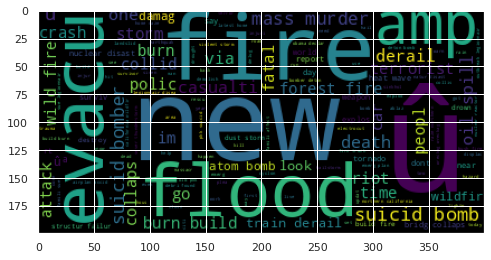

In [101]:
tweets_df["keyword_text"] = tweets_df["clean_keyword"]+" "+tweets_df["clean_text"]

emerg_df = tweets_df.loc[tweets_df["target"]==1,:]["keyword_text"]
disaster_text_str = " ".join(emerg_df)

wordcloud = WordCloud().generate(disaster_text_str)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.show()

#### **Most common words on non-emergency tweets for text and keyword** ####

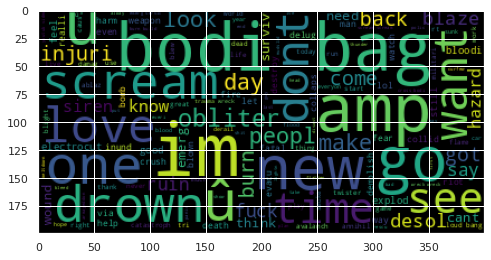

In [102]:
emerg_df = tweets_df.loc[tweets_df["target"]==0,:]["keyword_text"]
disaster_text_str = " ".join(emerg_df)

wordcloud = WordCloud().generate(disaster_text_str)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.show()